# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [80]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# Your answer here

temp = pd.read_csv("/Users/diegoperezo97/Documents/IronHack – Data Analytics Bootcamp/Module 2/Week 4/Day 1/lab-subsetting-and-descriptive-stats/your-code/Temp_States.csv")

#### Print `temp`

In [3]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# Your answer here

temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# Your answer here

new_york = temp[temp['State'] == 'New York']
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# Your answer here

new_york['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# Your answer here

cty_st_temp = temp[temp['Temperature'] > 15]
cty_st_temp

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# Your answer here

cty_temp = temp[temp['Temperature'] > 15].drop('State', axis=1)
cty_temp

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# Your answer here

cty_temp_15_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)].drop('State', axis=1)
cty_temp_15_20

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# Your answer here

temp.groupby('State').Temperature.agg(['mean', 'std'])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# Your answer here
employee = pd.read_csv("/Users/diegoperezo97/Documents/IronHack – Data Analytics Bootcamp/Module 2/Week 4/Day 1/lab-subsetting-and-descriptive-stats/your-code/employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# Your answer here

employee.head

<bound method NDFrame.head of      Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70>

In [13]:
# Your answer here

employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [14]:
# Your answer here

employee.shape

(9, 7)

In [15]:
# Your answer here

employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

['Jose' 'Maria' 'David' 'Sonia' 'Samuel' 'Eva' 'Carlos' 'Pedro' 'Ana']


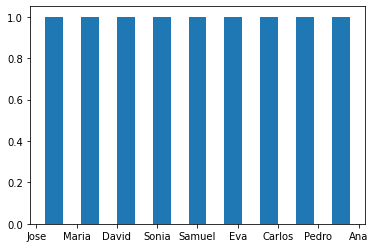

['IT' 'HR' 'Sales']


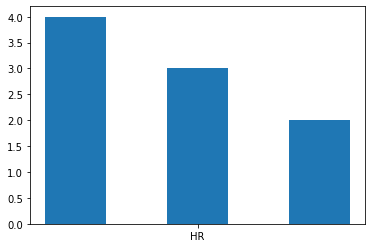

['Bachelor' 'Master' 'Phd']


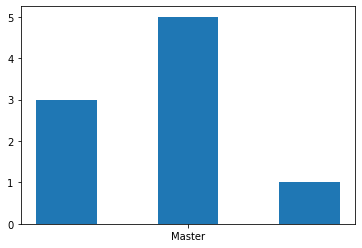

['M' 'F']


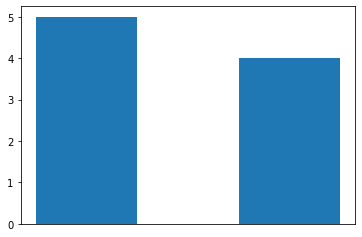

['analyst' 'associate' 'VP']


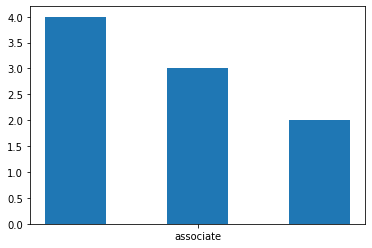

In [16]:
for column in list(employee.columns):
    if employee[column].dtype == 'O':
        print(employee[column].unique())
        plt.hist(employee[column].values.tolist(), bins=len(employee[column].unique()), rwidth=0.5)
        plt.show()

#### What's the average salary in this company?

In [17]:
# Your answer here

employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [18]:
# Your answer here

employee['Salary'].max()

70

#### What's the lowest salary?

In [19]:
# Your answer here

employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [20]:
# Your answer here

employee.loc[employee['Salary'] == employee['Salary'].min(), 'Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [21]:
# Your answer here

employee.loc[employee['Name'] == 'David', :]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [22]:
# Your answer here

employee.loc[employee['Name'] == 'David', 'Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [23]:
# Your answer here

employee.loc[employee['Title'] == 'associate', :]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [24]:
# Your answer here- 1 method

employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [25]:
# Your answer here- 2nd method

employee.loc[0:2, :]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [26]:
# Your answer here

employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55), 'Name']

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [27]:
# Your answer here

years = pd.pivot_table(
    employee,
    values=['Salary'],
    index=['Years', 'Name'],
    aggfunc={'Salary': np.mean}
)

years

Salary
Years Name          
1     Jose        35
2     David       30
      Eva         55
      Maria       30
3     Samuel      55
4     Sonia       35
7     Pedro       60
8     Ana         70
      Carlos      70

####  What is the average Salary per title?

In [28]:
# Your answer here

title = pd.pivot_table(
    employee,
    values=['Salary'],
    index=['Title'],
    aggfunc={'Salary': np.mean}
)

title

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

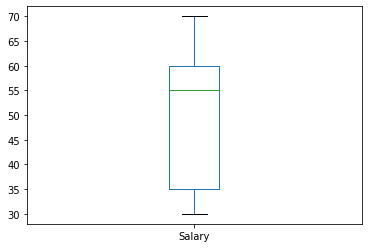

In [55]:
# Draw boxplot here

employee['Salary'].plot(kind='box')

In [58]:
# Print first quartile here

Q1 = np.percentile(employee['Salary'], 25)
Q1

35.0

In [60]:
# Print third quartile here

Q3 = np.percentile(employee['Salary'], 75)
Q3

60.0

<AxesSubplot:>

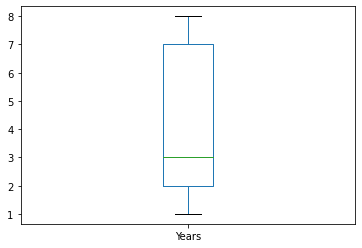

In [54]:
# Draw boxplot here

employee['Years'].plot(kind='box')

In [61]:
# Print first quartile here

Q1 = np.percentile(employee['Years'], 25)
Q1

2.0

In [63]:
# Print first quartile here

Q3 = np.percentile(employee['Years'], 75)
Q3

7.0

#### Is the mean salary per gender different?

In [64]:
# Your answer here

gender = pd.pivot_table(
    employee,
    values=['Salary'],
    index=['Gender'],
    aggfunc={'Salary': np.mean}
)

gender

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [65]:
# Your answer here

numeric = pd.pivot_table(
    employee,
    values=['Salary', 'Years'],
    index=['Department'],
    aggfunc={'Salary': ['min', 'mean', 'max'], 'Years': ['min', 'mean', 'max']}
)

numeric

Salary              Years               
              max   mean   min   max      mean  min
Department                                         
HR           70.0  45.00  30.0   8.0  4.666667  2.0
IT           70.0  48.75  30.0   8.0  4.500000  1.0
Sales        55.0  55.00  55.0   3.0  2.500000  2.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [77]:
# Your answer here

difference = pd.pivot_table(
    employee,
    values=['Salary'],
    index=['Department'],
    aggfunc={lambda x: x.max() - x.min()}
)

difference

,Salary
,<lambda>
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [35]:
# Your answer here

orders = pd.read_csv("/Users/diegoperezo97/Documents/IronHack – Data Analytics Bootcamp/Module 2/Week 4/Day 1/lab-subsetting-and-descriptive-stats/your-code/Orders.csv")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [117]:
# Your answer here

orders.head(50)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [37]:
# Your answer here

orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [38]:
# Your answer here

avg_purchase_price = orders['UnitPrice'].mean()
avg_purchase_price

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [39]:
# Your answer here

max_purchase_price = orders['UnitPrice'].max()
max_purchase_price

8142.75

In [40]:
# Your answer here

min_purchase_price = orders['UnitPrice'].min()
avg_purchase_price

3.1161744805540756

#### Select all the customers we have in Spain

In [41]:
# your answer here

customers = set(orders.loc[(orders['Country'] == 'Spain'), 'CustomerID'])
customers

{12354,
 12417,
 12421,
 12442,
 12445,
 12448,
 12450,
 12454,
 12455,
 12462,
 12484,
 12502,
 12507,
 12510,
 12538,
 12539,
 12540,
 12541,
 12544,
 12545,
 12546,
 12547,
 12548,
 12550,
 12551,
 12556,
 12557,
 12596,
 12597,
 17097}

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [42]:
# Your answer here

len(customers)

30

#### Select all the customers who have bought more than 50 items ?

In [43]:
# Your answer here

items = set(orders.loc[(orders['Quantity'] > 50), 'CustomerID'])
items

{16389,
 16394,
 16395,
 16398,
 16401,
 16405,
 16407,
 16409,
 16416,
 16419,
 16422,
 16432,
 16446,
 16457,
 16460,
 16463,
 16464,
 16466,
 16475,
 16480,
 16488,
 16493,
 16505,
 16511,
 16515,
 16523,
 16525,
 16531,
 16532,
 16549,
 16550,
 16551,
 16553,
 16558,
 16563,
 16566,
 16567,
 16570,
 16584,
 16592,
 16597,
 16603,
 16607,
 16609,
 16621,
 16626,
 16629,
 16637,
 16652,
 16655,
 16656,
 16657,
 16660,
 16669,
 16671,
 16672,
 16678,
 16681,
 16682,
 16684,
 16689,
 16692,
 16698,
 16700,
 16701,
 16705,
 16709,
 16710,
 16711,
 16712,
 16713,
 16715,
 16716,
 16717,
 16719,
 16722,
 16723,
 16729,
 16737,
 16745,
 16746,
 16747,
 16751,
 16754,
 16761,
 16767,
 16771,
 16773,
 16779,
 16805,
 16811,
 16813,
 16825,
 16836,
 16837,
 16839,
 16841,
 16843,
 16872,
 16873,
 16881,
 16900,
 16904,
 16906,
 16909,
 16917,
 16923,
 16927,
 16928,
 16938,
 16940,
 16945,
 16948,
 16949,
 16950,
 16965,
 16966,
 16969,
 16976,
 16980,
 16983,
 16984,
 16985,
 16986,
 16989,


#### Select orders from Spain that are above 50 items

In [44]:
# Your answer here

items_Spain = orders.loc[(orders['Quantity'] > 50) & (orders['Country'] == 'Spain'), 'InvoiceNo']

#### Select all free orders

In [45]:
# Your answer here

free_orders = orders.loc[orders['amount_spent'] == 0, 'InvoiceNo']
free_orders

6914      537197
22539     539263
25379     539722
29080     540372
29082     540372
34494     541109
53788     543599
85671     547417
92875     548318
97430     548871
107192    550188
128641    553000
137127    554037
194648    561284
197173    561669
199711    561916
208950    562973
223931    564651
223932    564651
223933    564651
223934    564651
256263    568158
259399    568384
273926    569716
286507    571035
307092    572893
319882    574138
320049    574175
320407    574252
322279    574469
328385    574879
329006    574920
329007    574920
334242    575579
334243    575579
352746    577129
353097    577168
354170    577314
358629    577696
370473    578841
Name: InvoiceNo, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [46]:
# Your answer here

lunc_bag = set(orders.loc[(orders['Description'] == 'lunch bag'), 'CustomerID'])
lunc_bag

set()

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [115]:
# Your answer here

def lunch_box(x):
    y = re.findall(r'^(.*?)[lunch box]$', x)
    return(y)

orders['Description'].apply(lunch_box)

0                                     []
1                   [white metal lanter]
2                                     []
3                                     []
4                                     []
                       ...              
397919                                []
397920     [children's apron dolly girl]
397921    [childrens cutlery dolly girl]
397922                                []
397923    [baking set 9 piece retrospot]
Name: Description, Length: 397924, dtype: object

#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

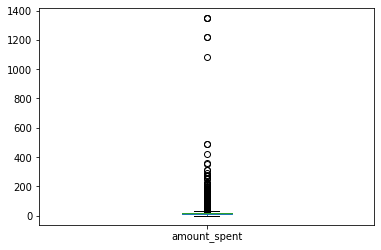

In [78]:
# your answer here

orders['amount_spent'][orders['Country'] == 'Spain'].plot(kind='box')

#### Select all orders made in the month of August

In [49]:
# your answer here

august = set(orders.loc[(orders['month'] == 8), 'CustomerID'])
august

{12347,
 12360,
 12362,
 12363,
 12364,
 12378,
 12381,
 12384,
 12395,
 12399,
 12415,
 12417,
 12418,
 12421,
 12423,
 12428,
 12431,
 12444,
 12449,
 12455,
 12464,
 12471,
 12473,
 12477,
 12484,
 12490,
 12492,
 12500,
 12502,
 12513,
 12517,
 12518,
 12523,
 12528,
 12530,
 12534,
 12540,
 12553,
 12560,
 12562,
 12567,
 12569,
 12571,
 12583,
 12584,
 12593,
 12594,
 12599,
 12600,
 12610,
 12619,
 12621,
 12624,
 12626,
 12627,
 12633,
 12641,
 12642,
 12643,
 12644,
 12645,
 12647,
 12649,
 12656,
 12662,
 12676,
 12678,
 12680,
 12682,
 12683,
 12688,
 12689,
 12693,
 12695,
 12704,
 12708,
 12712,
 12714,
 12715,
 12720,
 12722,
 12729,
 12747,
 12748,
 12749,
 12750,
 12758,
 12814,
 12823,
 12828,
 12839,
 12841,
 12844,
 12865,
 12877,
 12885,
 12901,
 12917,
 12919,
 12921,
 12931,
 12935,
 12948,
 12949,
 12962,
 12968,
 12971,
 12991,
 12993,
 12994,
 13000,
 13003,
 13004,
 13013,
 13014,
 13016,
 13018,
 13023,
 13027,
 13047,
 13048,
 13050,
 13069,
 13075,
 13078,


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [50]:
# Your answer here

len(august)

935

#### What's the  average amount of money spent by country

In [51]:
# your answer here

avg_amount_country = pd.pivot_table(
    orders,
    values=['amount_spent'],
    index=['Country'],
    aggfunc={'amount_spent': np.mean}
)

avg_amount_country

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [52]:
# Your answer here

orders.loc[orders['UnitPrice'] == orders['UnitPrice'].max(), 'Description']

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [53]:
# Your answer here

avg_amount_year = pd.pivot_table(
    orders,
    values=['amount_spent'],
    index=['year'],
    aggfunc={'amount_spent': np.mean}
)

avg_amount_year

,amount_spent
year,
2010,21.892733
2011,22.430074
